# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
There are thre emajor observations: 

1. Out of total ten drugs regimen, the efficacy of four drugs were analyzed based on the tumor volumes of the mouse being treated with corresponding drug at last time point in the unit of day. Among those four drugs Capomulin, Ramicane,Infubinol and Ceftamin, two drugs Capomulin and Ramicane demonstrated the greater efficacy in reducing the tumor volume (38.1mm3 and 36.6mm3) than the other two drugs Infubinol and Ceftamin (60.2mm3 and 59.9mm3) which can be seen in the Boxplot. It is worth to mention that there is only one outlier value present with Infubinol Treatment in the plot which indicates the results are quite precise. 

2. The date analysis also shows that the final tumor volume positively proportional to the weight of the mice being treated by Capomulin. As the results of analysis, r=0.84 and r2 is greater than 70% which means linear and coorelation exists, p value=1.3*E-07, less than 0.05 means that the difference is significant. The value of standard error is 0.1 means the results are precise. 

3. Total 249 mice were treated in differet groups in 10 drug regimen. The Mice-Timepoints of each drug regimen are comparable (around 200) which can be found in the bar graph. The mice gender is evenly distributed including 50.6% male and 49.4% female seen in the pie chart. 

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combine_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_number = len(combine_data_df['Mouse ID'].unique())
print("Number of mice:", mice_number)

Number of mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_data = combine_data_df.loc[combine_data_df.duplicated(subset = ['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_data

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_df = combine_data_df.loc[combine_data_df['Mouse ID']=='g989']
duplicate_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean_combine_data_df = combine_data_df.drop_duplicates(duplicate_mouse_df, keep= 'first')
clean_combine_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = len(clean_combine_data_df['Mouse ID'].unique())
print("Number of mice after cleaning: ", clean_mice_number)

Number of mice after cleaning:  249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = clean_combine_data_df.groupby('Drug Regimen')
tumor_volume_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_volume_median = summary_df['Tumor Volume (mm3)'].median()
tumor_volume_var = summary_df['Tumor Volume (mm3)'].var()
tumor_volume_std = summary_df['Tumor Volume (mm3)'].std()
tumor_volume_sem = summary_df['Tumor Volume (mm3)'].sem()


tumor_summary_df = pd.DataFrame({'Mean Tumor Volume' : tumor_volume_mean,
                           'Median Tumor Volume' : tumor_volume_median,
                           'Tumor Volume Variance': tumor_volume_var,
                           'Tumor Volume Std. Dev.': tumor_volume_std,
                           'Tumor Volume Std. Err.': tumor_volume_sem})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_combine_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


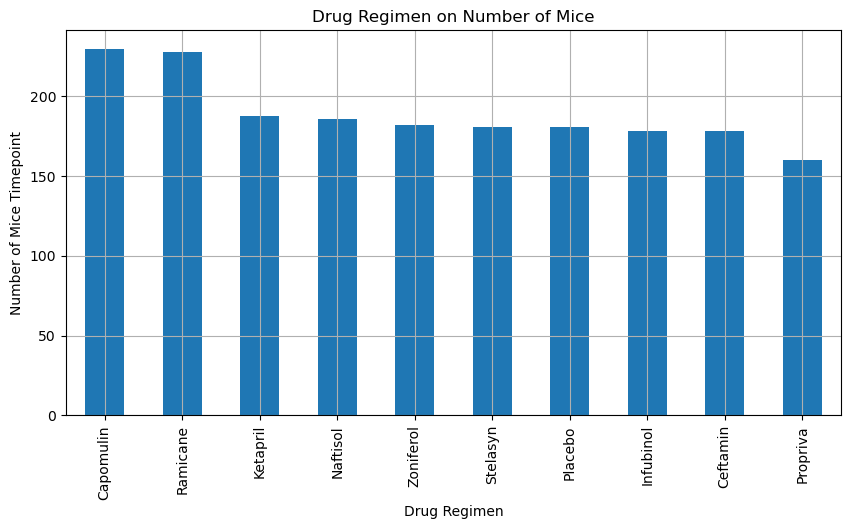

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Plot a bar chart (.plot.bar()) based on the data points (.value_counts())
# for each Drug Regimen (clean_combine_data_df['Drug Regimen'])
drug_regimen_bar = clean_combine_data_df["Drug Regimen"].value_counts()

drug_regimen_bar.plot.bar(figsize=(10,5))

#Set labels for axes
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Timepoint')
plt.title('Drug Regimen on Number of Mice')
plt.grid()
plt.show()

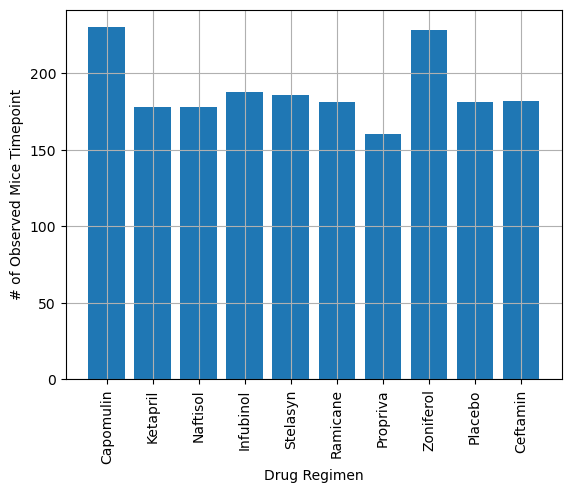

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_name = clean_combine_data_df['Drug Regimen'].unique()

# Create a list indicating where to write labels and set figure size
x_axis = drug_name
y_axis = clean_combine_data_df.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mice Timepoint')

#plt.figure(figsize=(10,5))

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.grid()
plt.show()

Sex
Male      958
Female    934
Name: count, dtype: int64


Text(0, 0.5, '')

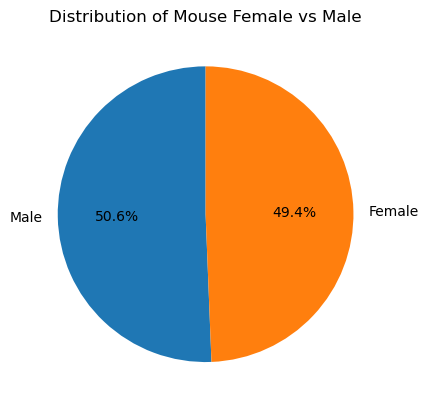

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Identify distribution of "sex" data
mouse_sex = clean_combine_data_df['Sex'].value_counts()
print(mouse_sex)
#Filled the chart with corresponding pecentage of the data. The orientation of the chart turned 90 degree from startangle counterclock wise
pie_plot = mouse_sex.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution of Mouse Female vs Male')

# Hide the 'y' label
pie_plot.set_ylabel('')

Text(0, 0.5, '')

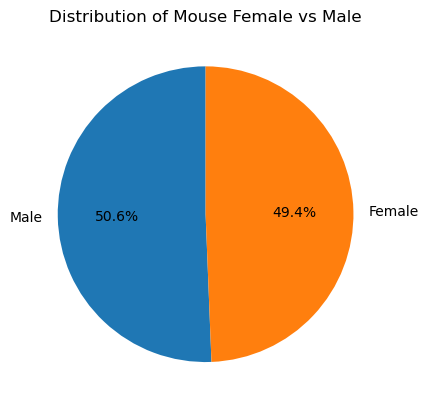

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Identify the 
mouse_sex = clean_combine_data_df['Sex'].value_counts()
#Plot the chart through matplotlib based on the corresponding pecentage of "sex" data. The orientation of the chart turned 90 degree counterclock wise from startangle
pie_plot = mouse_sex.plot(kind='pie', autopct='%1.1f%%', startangle = 90)
plt.title('Distribution of Mouse Female vs Male')

# Hide the 'y' label
pie_plot.set_ylabel('')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_combine_data_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_df = max_timepoint_df.merge(clean_combine_data_df,on=['Mouse ID','Timepoint'],how="left")
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_ca = []
tumor_vol_ra = []
tumor_vol_in = []
tumor_vol_ce = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(merged_data_df)-1):
    if merged_data_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_ca.append(merged_data_df.loc[i, "Tumor Volume (mm3)"])
    if merged_data_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ra.append(merged_data_df.loc[i, "Tumor Volume (mm3)"])
    if merged_data_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_in.append(merged_data_df.loc[i, "Tumor Volume (mm3)"])
    if merged_data_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_ce.append(merged_data_df.loc[i, "Tumor Volume (mm3)"])

# Combine the tumor volume under four treatments into a list for loop
final_tumor_vol = [tumor_vol_ca, tumor_vol_ra, tumor_vol_in, tumor_vol_ce]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

for a in range(len(final_tumor_vol)):
    quartiles = pd.Series(final_tumor_vol[a]).quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    print(
    f'{treatments[a]} Treatment'
    f'\nLower quartile: {q1}' 
    f'\nUpper quartile: {q3}'
    f'\nInterquartile range: {iqr}'
    f'\nMedian of tumor volume: {quartiles[0.5]}'
    f'\nPotential outliers 1: values below {lower_bound}'
    f'\nPotential outliers 2: values greater than {upper_bound}'
    f'\n---------------------------------------------------------')

    for b in range(len(final_tumor_vol[a])):
        if ( final_tumor_vol[a][b] <= lower_bound) | ( final_tumor_vol[a][b] >= upper_bound):
           outlier = final_tumor_vol[a][b]

Capomulin Treatment
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range: 7.781863460000004
Median of tumor volume: 38.1251644
Potential outliers 1: values below 20.70456164999999
Potential outliers 2: values greater than 51.83201549
---------------------------------------------------------
Ramicane Treatment
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Median of tumor volume: 36.56165229
Potential outliers 1: values below 17.912664470000003
Potential outliers 2: values greater than 54.30681135
---------------------------------------------------------
Infubinol Treatment
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Median of tumor volume: 60.16518046
Potential outliers 1: values below 36.83290494999999
Potential outliers 2: values greater than 82.74144559000001
---------------------------------------------------------
Ceftamin Treatment
Lower quartile: 48.72207785


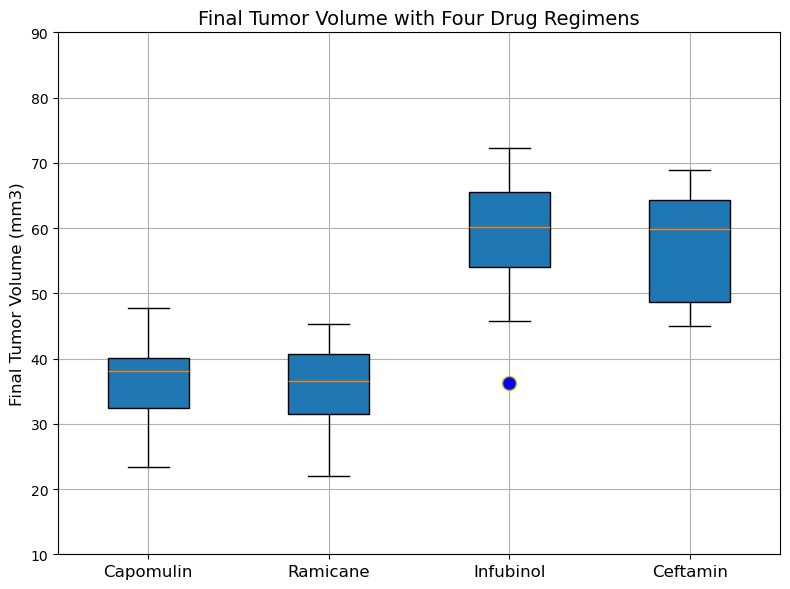

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Define parameters for the plot
# Lable title, x axis and y axis
flierprops=dict(marker='o', markerfacecolor='b', markeredgecolor='y', markersize=10, linestyle='none',)
fig1, ax1 = plt.subplots(figsize=(8,6))

ax1.set_title("Final Tumor Volume with Four Drug Regimens", fontsize = 14)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize = 12)
ax1.set_xticklabels(treatments, fontsize = 12)
ax1.boxplot(final_tumor_vol, flierprops = flierprops, patch_artist=True)

plt.ylim(10, 90)
plt.grid()
plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings("ignore")


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_combine_data_df.loc[clean_combine_data_df["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Choose Mouse ID "b128"
b128_tumor = clean_combine_data_df.loc[clean_combine_data_df["Mouse ID"]=="b128"]
b128_tumor


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


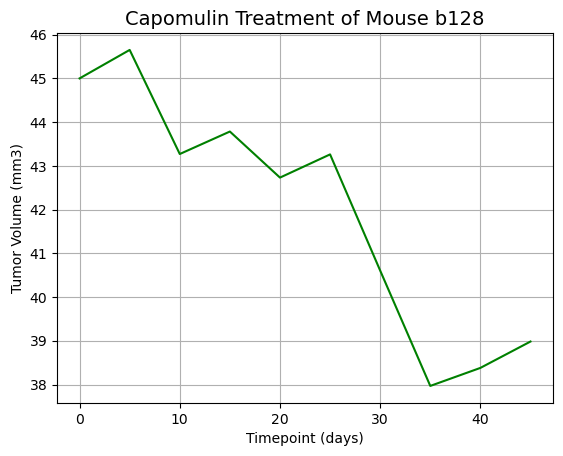

In [19]:
plt.plot(b128_tumor["Timepoint"],b128_tumor["Tumor Volume (mm3)"], color = "green")
plt.title("Capomulin Treatment of Mouse b128", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

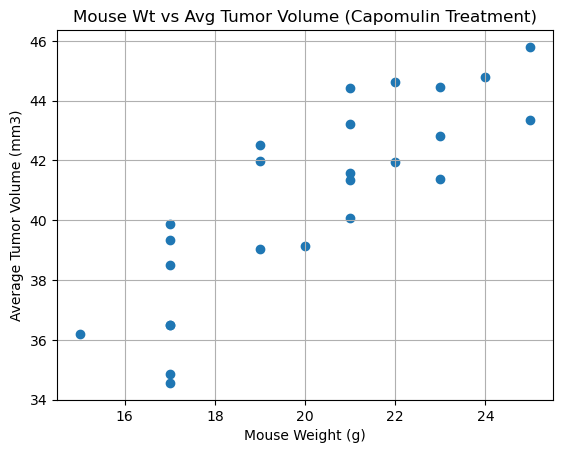

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_combine_data_df.loc[clean_combine_data_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
tumor_avg_ca = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_wt = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_wt, tumor_avg_ca)
plt.title("Mouse Wt vs Avg Tumor Volume (Capomulin Treatment)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

The correlation between mouse wt and tumor avg volume is 0.84.

slope:0.9544396890241049
intercept:21.552160532685008
r value:0.8419363424694721
p value:1.3225722434712404e-07
std error:0.12754359033201323
y = 0.95x + 21.55


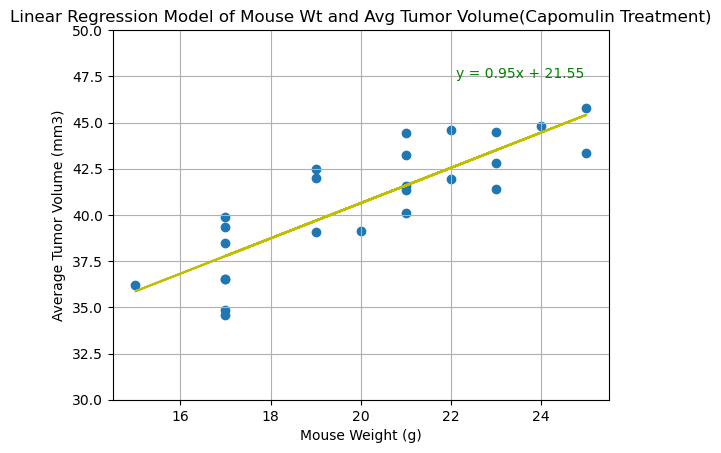

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate slope, intercept, r value, p value and standard error 
# Plot linear regression equation

mouse_weight = mouse_wt.astype(float)
corr = round(st.pearsonr(mouse_weight, tumor_avg_ca)[0],2)

print(f"The correlation between mouse wt and tumor avg volume is {corr}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_avg_ca)
regress_values = mouse_weight * slope + intercept
print(
    f"\nslope:{slope}"
    f"\nintercept:{intercept}"
    f"\nr value:{rvalue}"
    f"\np value:{pvalue}"
    f"\nstd error:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(mouse_weight, tumor_avg_ca)
plt.plot(mouse_weight,regress_values,"y-")
plt.title("Linear Regression Model of Mouse Wt and Avg Tumor Volume(Capomulin Treatment)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.95, 0.9), textcoords='axes fraction', 
             horizontalalignment='right', verticalalignment='top',fontsize=10,color="g")
plt.grid()
plt.ylim(30, 50)
plt.show()